In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [25]:
covid = pd.read_csv("Covid Data.csv")
covid

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [26]:
covid = covid.loc[(covid.CLASIFFICATION_FINAL < 4)]
covid = covid.loc[(covid.SEX == 1) | (covid.SEX == 2)]
covid = covid.loc[(covid.USMER == 1) | (covid.USMER == 2)]
covid = covid.loc[(covid.PATIENT_TYPE == 1) | (covid.PATIENT_TYPE == 2)]
covid = covid.loc[(covid.PNEUMONIA == 1) | (covid.PNEUMONIA == 2)]
covid = covid.loc[(covid.DIABETES == 1) | (covid.DIABETES == 2)]
covid = covid.loc[(covid.COPD == 1) | (covid.COPD == 2)]
covid = covid.loc[(covid.ASTHMA == 1) | (covid.ASTHMA == 2)]
covid = covid.loc[(covid.INMSUPR == 1) | (covid.INMSUPR == 2)]
covid = covid.loc[(covid.HIPERTENSION == 1) | (covid.HIPERTENSION == 2)]
covid = covid.loc[(covid.OTHER_DISEASE == 1) | (covid.OTHER_DISEASE == 2)]
covid = covid.loc[(covid.CARDIOVASCULAR == 1) | (covid.CARDIOVASCULAR == 2)]
covid = covid.loc[(covid.OBESITY == 1) | (covid.OBESITY == 2)]
covid = covid.loc[(covid.RENAL_CHRONIC == 1) | (covid.RENAL_CHRONIC == 2)]
covid = covid.loc[(covid.TOBACCO == 1) | (covid.TOBACCO == 2)]

In [27]:
covid.SEX = covid.SEX.apply(lambda x: x if x == 1 else 0)  
covid.USMER = covid.USMER.apply(lambda x: x if x == 1 else 0)                     # no = 0, yes = 1
covid.PATIENT_TYPE = covid.PATIENT_TYPE.apply(lambda x: 0 if x == 1 else 1)     
covid.PNEUMONIA = covid.PNEUMONIA.apply(lambda x: x if x == 1 else 0)           
covid.DIABETES = covid.DIABETES.apply(lambda x: x if x == 1 else 0)             
covid.COPD = covid.COPD.apply(lambda x: x if x == 1 else 0)                     
covid.ASTHMA = covid.ASTHMA.apply(lambda x: x if x == 1 else 0)                 
covid.INMSUPR = covid.INMSUPR.apply(lambda x: x if x == 1 else 0)               
covid.HIPERTENSION = covid.HIPERTENSION.apply(lambda x: x if x == 1 else 0)     
covid.OTHER_DISEASE = covid.OTHER_DISEASE.apply(lambda x: x if x == 1 else -0)  
covid.CARDIOVASCULAR = covid.CARDIOVASCULAR.apply(lambda x: x if x == 1 else 0) 
covid.OBESITY = covid.OBESITY.apply(lambda x: x if x == 1 else 0)               
covid.RENAL_CHRONIC = covid.RENAL_CHRONIC.apply(lambda x: x if x == 1 else 0)   
covid.TOBACCO = covid.TOBACCO.apply(lambda x: x if x == 1 else 0)               
covid.DATE_DIED = covid.DATE_DIED.apply(lambda x: 0 if x == "9999-99-99" else 1)
covid.PREGNANT = covid.PREGNANT.apply(lambda x: x if x == 1 else 0)           
covid.INTUBED = covid.INTUBED.apply(lambda x: x if x == 1 else 0)                   
covid.ICU = covid.ICU.apply(lambda x: x if x == 1 else 0)

In [5]:
covid.keys()

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [28]:
covid
target = covid["DATE_DIED"]
covid = covid.drop("DATE_DIED", axis = 1)

In [8]:
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(covid[['SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
#        'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
#        'HIPERTENSION', 'CARDIOVASCULAR', 'OBESITY',
#        'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU']])
# #scaleddata
# scaled_covid = pd.DataFrame(scaled_data, columns=covid.columns)
# scaled_covid.head()


KeyError: ignored

In [8]:
# pca = PCA(n_components = 0.90)
# scaled_pca = pca.fit_transform(scaled_covid)
# pca_df = pd.DataFrame(data=scaled_pca, columns=["PCA1", "PCA2", "PCA3", "PCA4","PCA5", "PCA6", "PCA7", "PCA8","PCA9", "PCA10","PCA11","PCA12","PCA13","PCA14"])
# pca_df.head()

NameError: ignored

In [ ]:
# tsne = TSNE(learning_rate = 75)
# #reduce dimensions
# tsne_features = tsne.fit_transform(pca_df)
# tsne_features.shape

In [ ]:
# pca_df['x'] = tsne_features[:,0]
# pca_df['y'] = tsne_features[:,1]
# plt.scatter(pca_df['x'], pca_df['y'])
# plt.show()


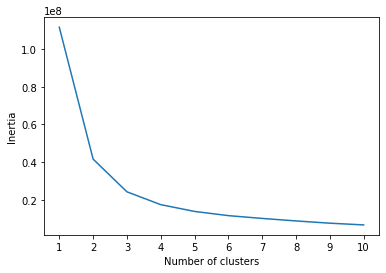

In [29]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]
# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(covid)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [31]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data , model

In [32]:
clusters, model = get_clusters(3, covid)
clusters

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,class
0,0,1,1,0,0,1,65,0,0,0,...,0,1,0,0,0,0,0,3,0,0
2,0,1,0,1,1,0,55,0,1,0,...,0,0,0,0,0,0,0,3,0,2
4,0,1,0,0,0,0,68,0,1,0,...,0,1,0,0,0,0,0,3,0,0
5,0,1,1,1,0,1,40,0,0,0,...,0,0,0,0,0,0,0,3,0,2
6,0,1,1,0,0,0,64,0,0,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047933,1,13,1,1,0,0,77,0,1,0,...,1,1,0,0,0,0,0,3,0,0
1047934,1,13,1,0,0,0,55,0,1,0,...,0,0,0,0,0,0,0,3,0,2
1047935,1,13,0,0,0,0,70,0,0,0,...,0,1,0,0,0,0,0,3,0,0
1047936,0,13,0,0,0,0,32,0,0,0,...,0,0,0,0,0,0,0,3,0,1


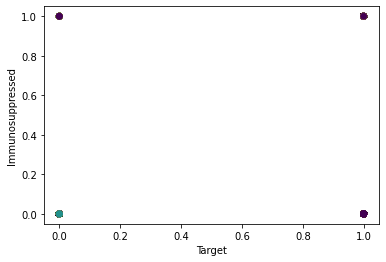

In [33]:
plt.scatter(target, covid['INMSUPR'], c=covid['class'])
plt.xlabel("Target")
plt.ylabel("Immunosuppressed")
plt.show()

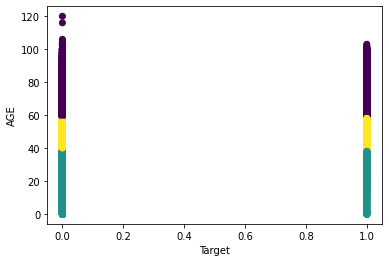

In [34]:
plt.scatter(target, covid['AGE'], c=covid['class'])
plt.xlabel("Target")
plt.ylabel("AGE")
plt.show()

In [35]:
# model.save("kmeans.h5")

AttributeError: ignored

In [36]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# define the training dataset
X, y = covid, target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .99)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# define the random forest classifier

# train the classifier using the training dataset
clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
# predict the classes for new data

Training Score: 0.9940843621399177
Testing Score: 0.8999974025299359


AttributeError: ignored

[0.03059397 0.07127481 0.02880148 0.12269605 0.13545043 0.11258472
 0.2647864  0.00051428 0.0309102  0.00742795 0.00709501 0.00508956
 0.0304396  0.00819947 0.01118024 0.02694329 0.01045946 0.01443636
 0.0127623  0.01901969 0.04933475]


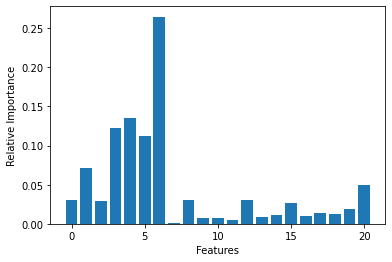

In [18]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.xlabel("Features")
plt.ylabel("Relative Importance")
plt.show()